In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the data and put it in variable "Data"
Data=pd.read_csv("insurance.csv")
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Know the info of variable in data
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# To the statistics info of the data
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# To know the duplicate value in the data
Data.duplicated().sum()

1

In [6]:
# To drop the duplicate value in data
Data.drop_duplicates(inplace=True)
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# To get valce_count of categorical variable
for i in Data.columns:
    if Data[i].dtype == "object":
        print(Data[i].value_counts())


male      675
female    662
Name: sex, dtype: int64
no     1063
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


In [8]:
# Now convert categorical data into numarical data
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in Data.columns:
    if Data[i].dtype=="object":
        Data[i]=lab.fit_transform(Data[i])
Data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


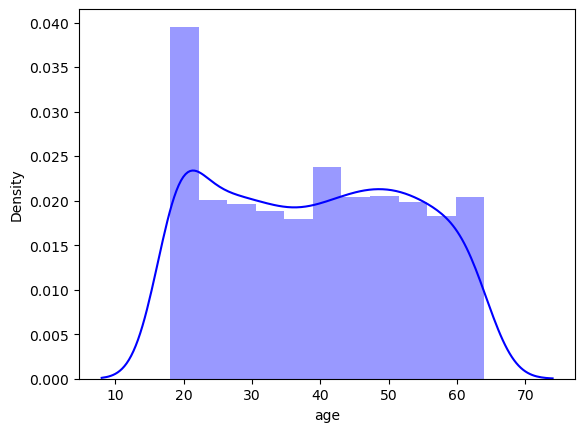

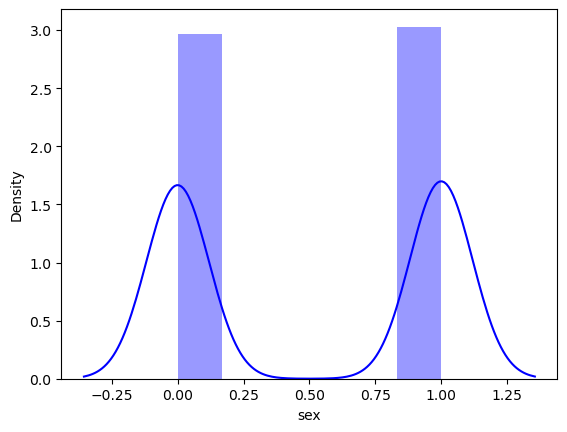

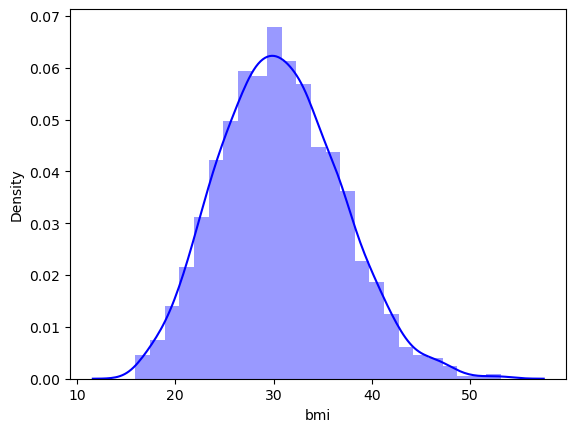

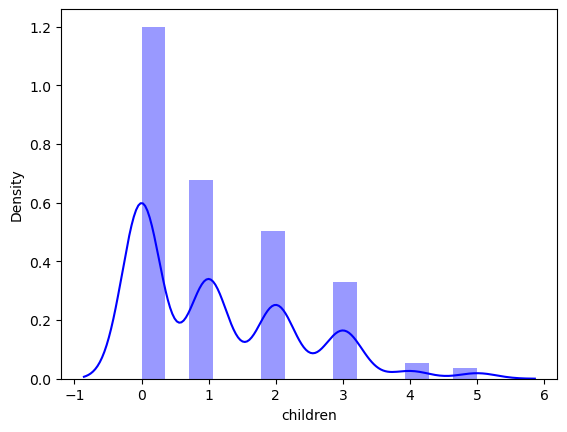

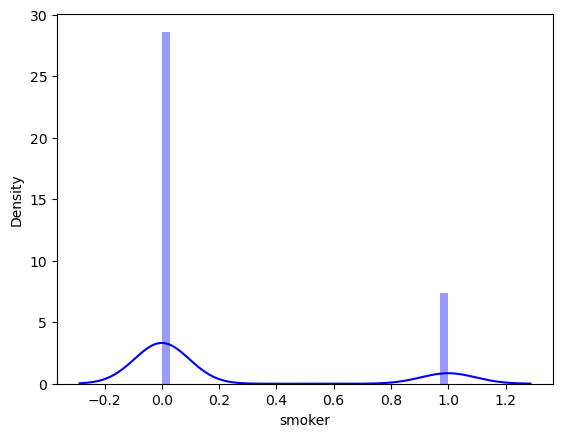

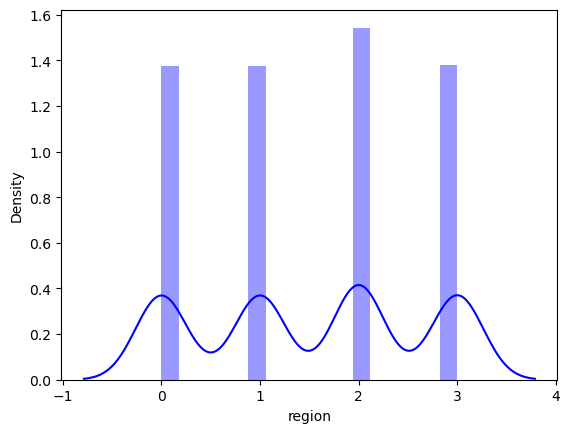

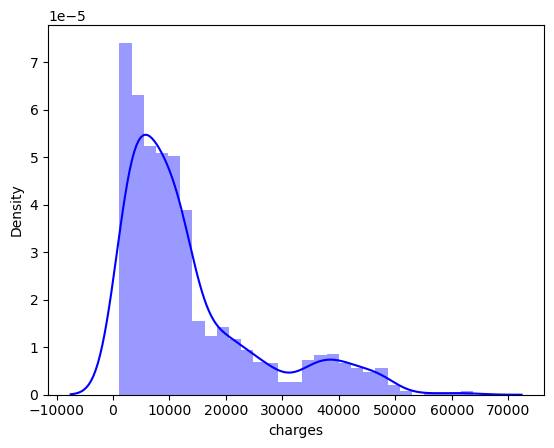

In [9]:
#See the skewness in the data
for i in Data.columns:
    sns.distplot(Data[i],color="blue")
    plt.show()

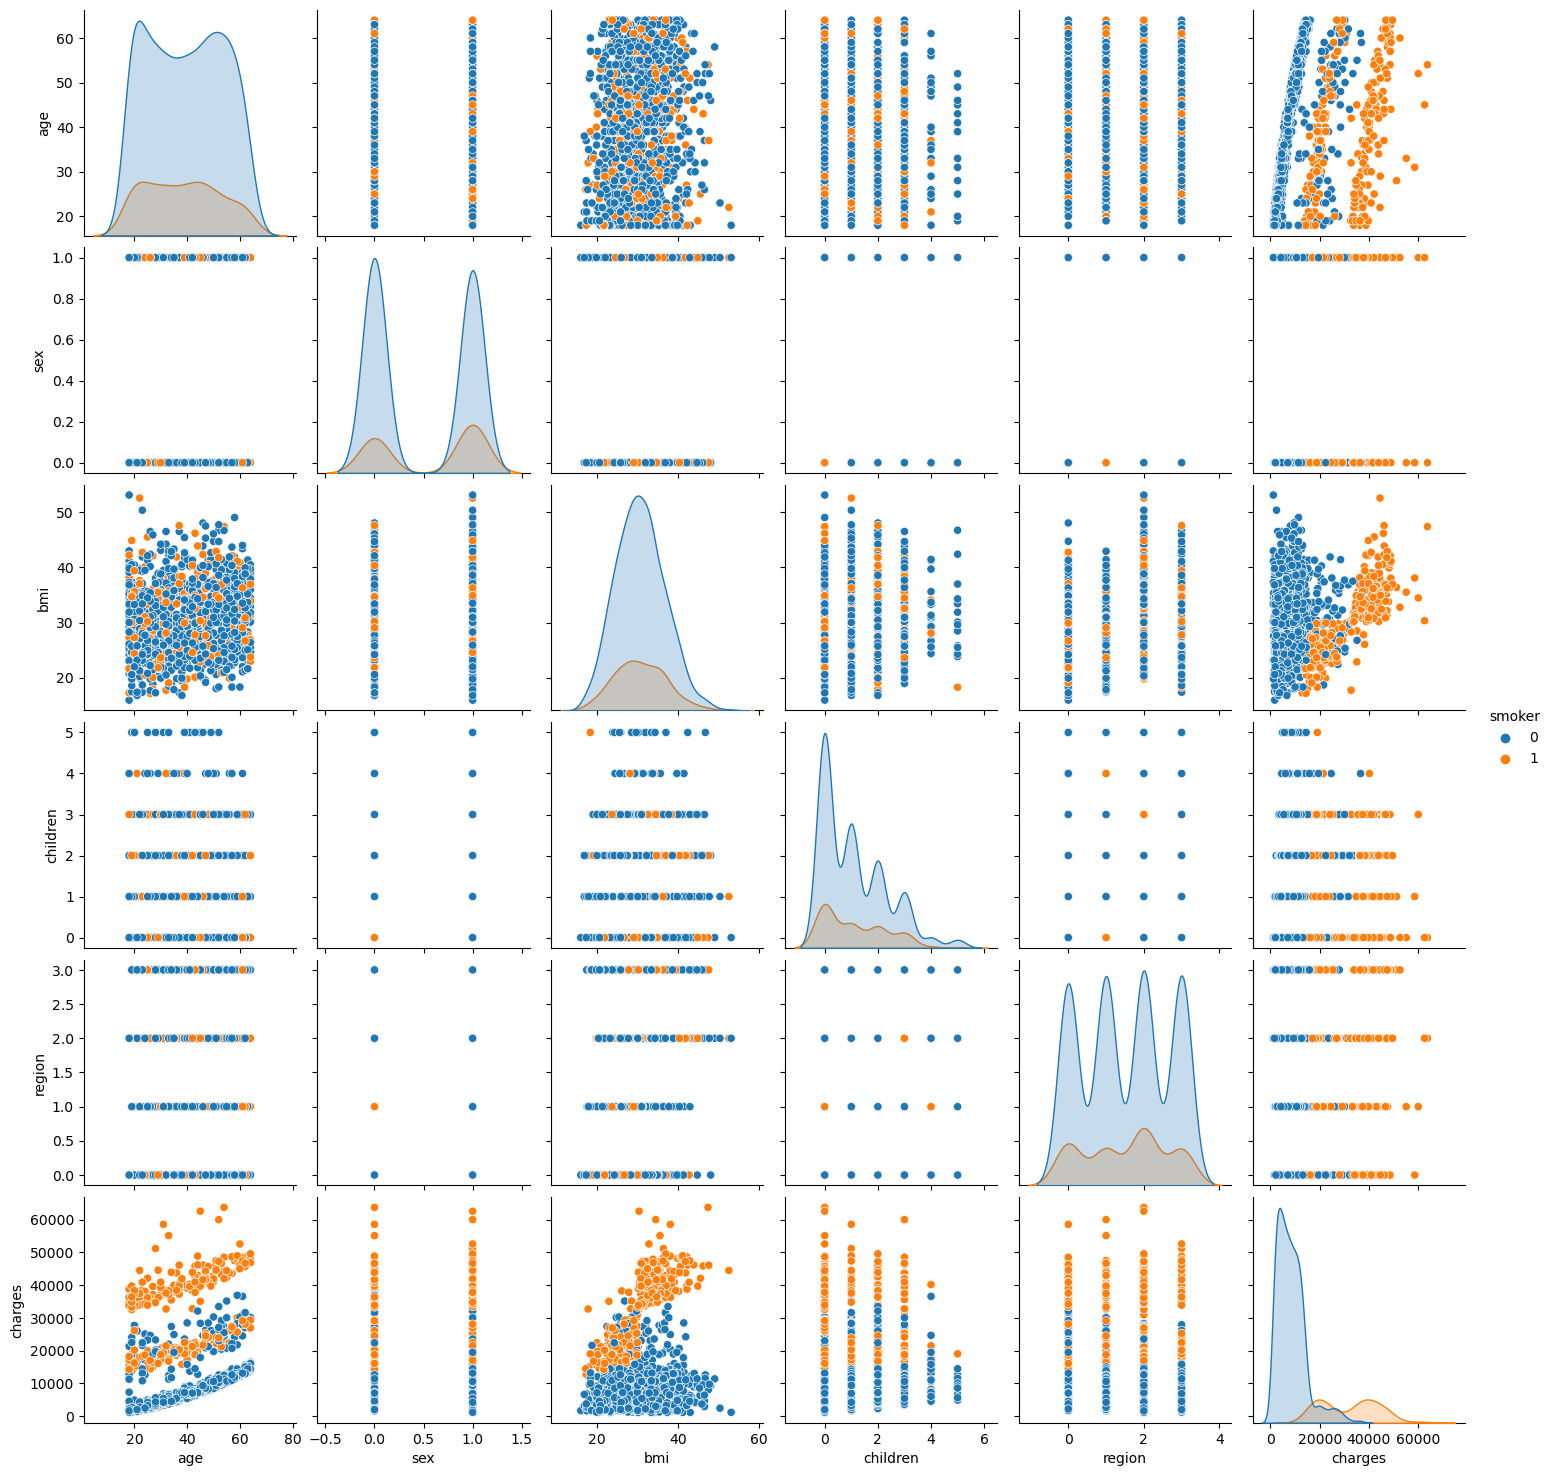

In [10]:
# To see the distibution of data we plot pairplot
sns.pairplot(data=Data,hue="smoker")

<AxesSubplot:>

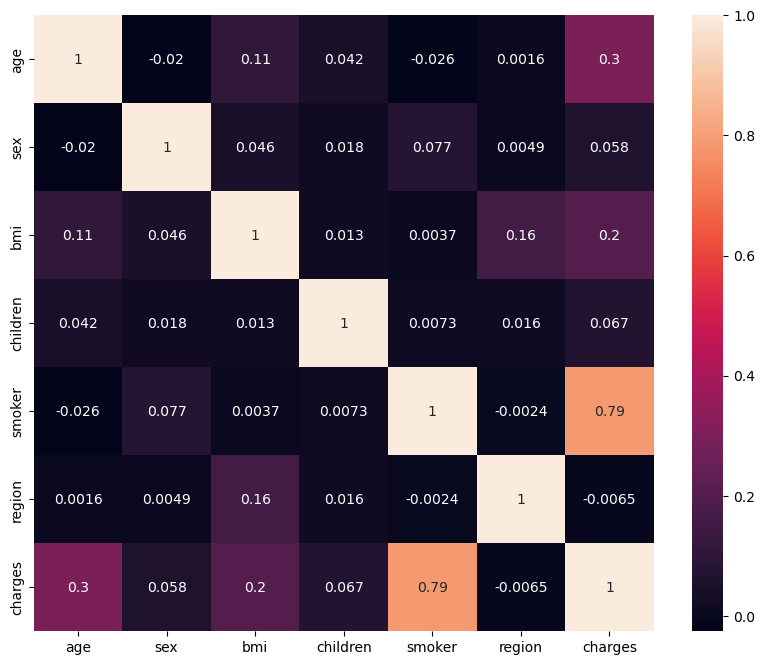

In [11]:
#Now plot the heatmap to the correlation of the data
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(),annot=True)# annot show the value of correlation

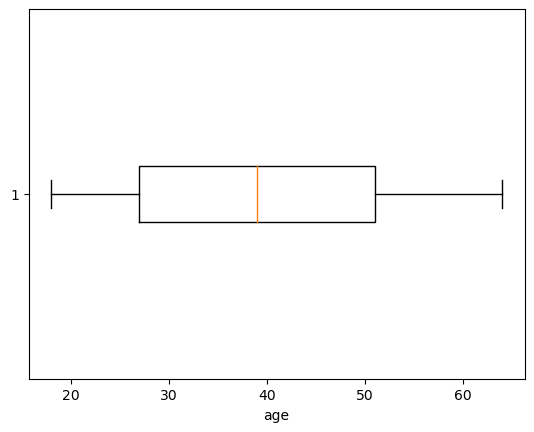

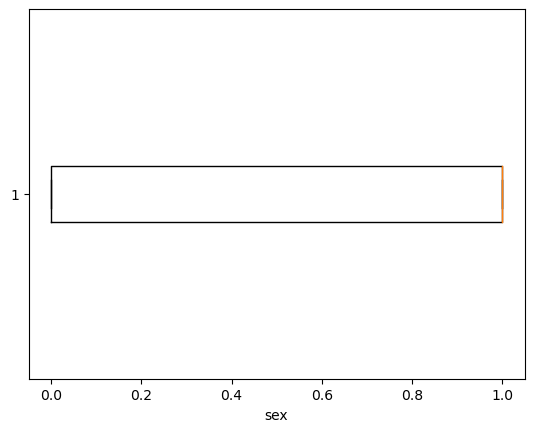

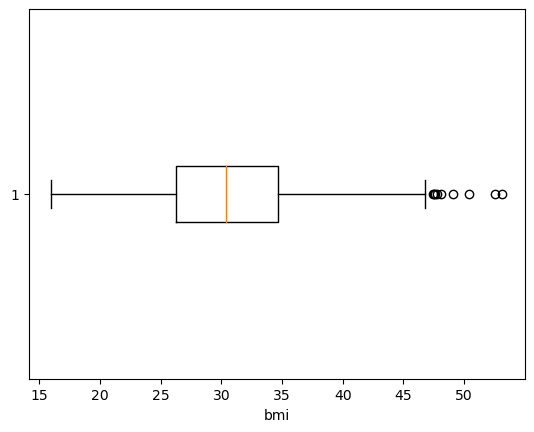

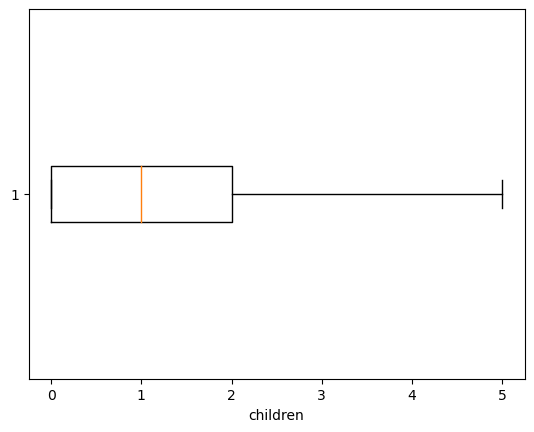

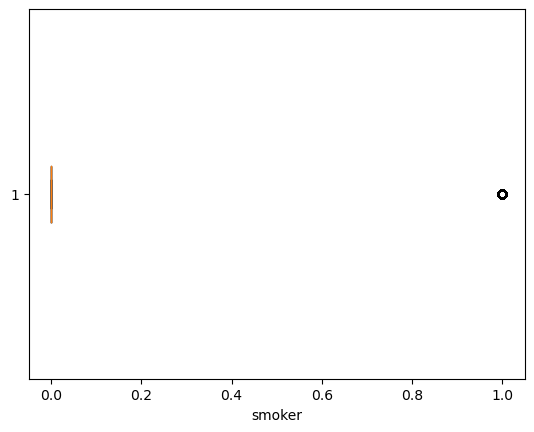

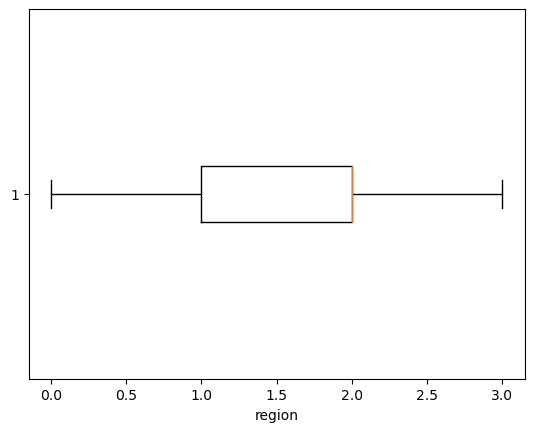

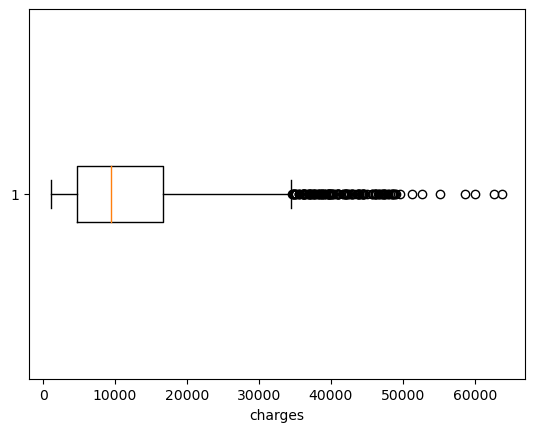

In [12]:
# Now plot the boxplot to see the outliers

for i in Data.columns:
    plt.boxplot(Data[i], vert=False)  # vert=False to show the boxplot horizontally
    plt.xlabel(i)
    plt.show()

In [13]:
# Now we treat outliers with IQR method
Q1=np.quantile(Data["bmi"],0.25)
Q2=np.quantile(Data["bmi"],0.50)
Q3=np.quantile(Data["bmi"],0.75)
Q4=np.quantile(Data["bmi"],1.0)
IQR=Q3-Q1
print("IQR=",IQR)
Lower_Fence=Q1-(1.5*IQR)
Upper_Fence=Q3+(1.5*IQR)
print("Lower_Fence=",Lower_Fence)
print("Upper_Fence=",Upper_Fence)

IQR= 8.410000000000004
Lower_Fence= 13.674999999999994
Upper_Fence= 47.31500000000001


<AxesSubplot:xlabel='bmi'>

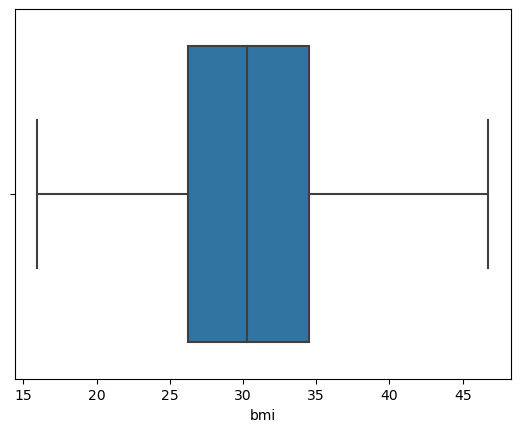

In [14]:
# Now outliers is remove from the data
df=Data.loc[(Data["bmi"]<Upper_Fence) & (Data["bmi"]>Lower_Fence)]
sns.boxplot(data=df,x="bmi")

In [15]:
# Drop the divide the data in x & y, all columns in x except "charges", y take "charges" column
x=Data.drop(["charges"],axis=1)
y=Data["charges"]
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]


In [16]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [17]:
# Use standard scaler for scale all variable in between -3 to 3
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X=sta.fit_transform(x)
print(X)

[[-1.44041773 -1.00977099 -0.45315959 -0.90923416  1.96966039  1.34316271]
 [-1.51164747  0.99032355  0.50942165 -0.07944162 -0.50770174  0.43801727]
 [-0.79935006  0.99032355  0.3831546   1.58014347 -0.50770174  0.43801727]
 ...
 [-1.51164747 -1.00977099  1.01448983 -0.90923416 -0.50770174  0.43801727]
 [-1.29795825 -1.00977099 -0.79752426 -0.90923416 -0.50770174  1.34316271]
 [ 1.55123139 -1.00977099 -0.26129928 -0.90923416  1.96966039 -0.46712816]]


In [18]:
# Spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1069, 6), (268, 6), (1069,), (268,))

In [19]:
# let see the coefficient and Intercept
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
print("slope value are="+str(lm.coef_))
print("The intercept is="+str(lm.intercept_))

slope value are=[3462.46513524 -137.7356598  2108.9192384   671.98376394 9529.00579581
 -426.75486571]
The intercept is=13371.97757155935


In [20]:
# Predicting "y_pred" that is "charges" column
y_pred=lm.predict(x_test)
y_pred

array([ 6462.76053972,  1568.76868915, 11552.81650105, 14147.70792033,
        2870.32520295,  7173.46707107,  6099.93587347,  3955.30785167,
       38241.52840186, 11684.58708955, 16347.99946576,  4138.05966048,
       12227.24265306,  7095.64508587,  3915.86807736, 38592.53900199,
       10276.01955628,   484.60018684, 11226.33526556,   -77.90028502,
        8396.02812298,  3401.71079628,  6023.28654054, 11253.61835172,
       27210.32844661,  8173.74280179, 32745.96555806,  8256.52610083,
       14606.29170192, 11837.68730232,  8430.66371218, 11712.90039315,
       38268.84775099, 31781.43445986, 12443.44231271,  1166.66875704,
        9021.36165702,  -146.93415355,  5490.47121941, 16425.92704639,
       24808.04952999,   439.2540063 ,  1840.47953863,  8293.35323319,
       14634.35665239,  8378.47989473, 12136.1123657 , 39878.01157347,
       30505.76289818, 38698.25196248,  2895.56794278,  2162.51422481,
       12673.73743789,  8498.53731662, 35760.83308518,  3942.52608872,
      

In [21]:
# Performance Matrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=(mse)**1/2
adjr2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("MSE=",mse)
print("MAE=",mae)
print("R2=",r2)
print("RMSE=",rmse)
print("ADJR2=",adjr2)

MSE= 29948617.86453913
MAE= 3911.8415156656183
R2= 0.8005361116262141
RMSE= 14974308.932269566
ADJR2= 0.7959507348819891


In [22]:
lm.score(x_train,y_train)

         

0.7371803930047189

In [23]:
lm.score(x_test,y_test)

0.8005361116262141